### Анализ поведения пользователей онлайн игры

КЕЙС:

В приложении игры Quiz Freeze запущенно обновление. У разработчиков возникли гипотезы по поведении игроков, которые необходимо проверить. Использовать для анализа  нужно только данные пользователей, которые зарегистрировались в 2018 году.

ГИПОТЕЗЫ:

Гипотеза 1
По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

Гипотеза 2
Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

Гипотеза 3
Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?

ЗАДАЧИ:
1. Определить, насколько обучение сокращает время прохождения этапов игры.
2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
3. Определить, насколько прозрачен процесс взаимодействия с игрой.

ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ:
1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.
2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 
3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна).

ЭТАПЫ ПРОХОЖДЕНИЯ ИГРЫ:
![](https://docs.google.com/drawings/d/e/2PACX-1vRtyzDIKtMjKP52C1ujIe-swMQNlgVhQ2kq6tws2IBZ2PkgILFxWoIvBf3854SXgDyeiSy6G7jE9O5G/pub?w=1444&h=150)

### <a name='link1'></a> Исходные данные
1. Таблица Event
хранит данные о событиях, которые совершают пользователи. По сути, каждое событие — это факт прохождения пользователем какого-либо этапа игры.
1. Таблица purchase
хранит данные об оплатах, которые совершают пользователи.

### <a name='link2'></a> Исследование и подготовка данных

Импортируем все необходимые библиотеки и модули

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Прочитаем исходные файлы 7_4_Events.csv, purchase.csv, сохраним их в переменных event_df и purchase_df.

In [336]:
# events_df = pd.read_csv('data/7_4_Events.csv')
# purchase_df = pd.read_csv('data/purchase.csv')
events_df = pd.read_csv('7_4_Events.csv')
purchase_df = pd.read_csv('purchase.csv')

Создадим маску correct_time для фильтрации пользователей зарегистрировавшихся в 2018 г.
На основе correct_time создадим список user_id зарегистрировавшихся в 2018 г. (users_2018).
Обновим events_df, оставляя в нём только необходимые события (фильтрация с помощью users_2018)
Обновим purchase_df, оставляя в нём только необходимые события (фильтрация с помощью users_2018)

In [337]:
correct_time = (events_df['start_time'] >= '2018-01-01') & (events_df['start_time'] <'2019-01-01') & (events_df['event_type'] == 'registration')
users_2018 = events_df[correct_time]['user_id'].to_list()
events_df  = events_df[events_df['user_id'].isin(users_2018)]
purchase_df = purchase_df[purchase_df['user_id'].isin(users_2018)]


Переведем столбцы 'start_time' и 'event_datetime' в формат datetime.

In [338]:
events_df['start_time'] = pd.to_datetime (events_df['start_time'])
purchase_df['event_datetime'] = pd.to_datetime (purchase_df['event_datetime'])


Изучим данные в  полученных датасетах:


In [339]:
events_df.info()
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              66959 non-null  int64         
 1   event_type      66959 non-null  object        
 2   selected_level  8342 non-null   object        
 3   start_time      66959 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         66959 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1600 non-null   int64         
 1   user_id         1600 non-null   int64         
 2   event_datetime  1600 non-null   datetime64[ns]
 3   amount          

Удалим потенциальные повторы

In [340]:
purchase_df.drop_duplicates()
events_df.drop_duplicates()

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836
...,...,...,...,...,...,...
118359,147262,tutorial_start,NaN,2019-01-01 03:26:18,49554.0,47756
118360,147263,tutorial_finish,NaN,2019-01-01 03:29:25,49554.0,47756
118362,147265,level_choice,easy,2019-01-01 05:04:52,NaN,47755
118363,147266,level_choice,medium,2019-01-01 05:42:11,NaN,47756


Изучим данных в столбцах:
    количество уникальных пользователей,
    уникальные значения столбца selected_level,
    уникальные значения столбца event_type.
    

In [341]:

print(events_df['user_id'].nunique())
print(events_df['selected_level'].unique())
print(events_df['event_type'].unique())

19926
[nan 'medium' 'hard' 'easy']
['registration' 'tutorial_start' 'tutorial_finish' 'level_choice'
 'pack_choice']


Шапки полученных таблиц

In [342]:
events_df.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836


In [343]:
purchase_df.head()

,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03 18:53:43,100
1172,16846,27865,2018-01-04 14:46:10,250
1174,16848,27911,2018-01-07 08:19:12,50
1175,16849,27910,2018-01-07 12:11:34,100
1176,16850,27940,2018-01-07 13:16:41,200


Подготовим events_df и purchase_df к корректному объединению: переименуем столбцы, создадим новые.

In [344]:
purchase_df['event_type'] = 'purchase'
events_df = events_df.rename(columns={"id": "event_id"})
purchase_df = purchase_df.rename(columns={"id": "purchase_id", "event_datetime": "start_time"})

Объеденим по методу concat, сбросим индексы и отсортируем по возростанию 'start_time'

In [345]:
total_events_df = pd.concat([events_df,purchase_df],sort=False)
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')

Сохраним total_events_df для работы гипотезами.

In [346]:
total_events_df.head()

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN


### <a name='link3'></a> Проверка 1-ой гипотезы. Зависимость обучения и скорости прохождения этапов игры

Создадим списки пользователей которые:
завершили обучение; начинали обучение; начинали играть; начинали играть пропустив обучение (путем вычитания множеств)

In [347]:
finished_tut = events_df[events_df['event_type'] == 'tutorial_finish']['user_id'].tolist()
users_started_tut = events_df[events_df['event_type'] == 'tutorial_start']['user_id'].tolist()
users_started_play = events_df[events_df['event_type'] == 'level_choice']['user_id'].tolist()
never_started_tut = list(set(users_started_play).difference(set(users_started_tut)))

Скопируем new_total_events для работы с 1-ой гипотезой

In [348]:
new_total_events=total_events_df

Построим сводную таблицу, в которой столбцами будут этапы прохождения игры, индексами - user_id, значениями - 'start_time'

In [349]:
new_total_events = new_total_events.pivot_table (
    values='start_time',
    index='user_id',
    columns='event_type'
     , aggfunc='min' 
)
new_total_events = new_total_events.reset_index()

Создадим функцию type_of_user для определения категории пользователя (обучался, не обучался, остальные)

In [350]:
def type_of_user (id):
    if id in (finished_tut):
        return 'finished_tut'
    if id in (never_started_tut):
        return 'never_started_tut'
    else:
        return 'other'

Применим фун-ию type_of_user для создания нового признака user_type. Отфильтруем df убрав все записи категории 'other', оставив тем самым только интересующие нас категории пользователей.

In [351]:
new_total_events['user_type'] = new_total_events.user_id.apply(type_of_user)
new_total_events = new_total_events[new_total_events['user_type']!='other']

Создадим 3 новых столбца : level_pack_timedelta - время на прохождение этапа между выбором уровня сложности и выбором пакета вопросов; pack_purchase_timedelta - время на прохождение этапа между выбором пакета вопросов и покупкой ; regist_purchase_timedelta - время на прохождение этапа между регистрацией и покупкой.

In [352]:
new_total_events['level_pack_timedelta'] = new_total_events['pack_choice'] - new_total_events['level_choice']
new_total_events['pack_purchase_timedelta'] = new_total_events['purchase'] - new_total_events['pack_choice']
new_total_events['regist_purchase_timedelta'] = new_total_events['purchase'] - new_total_events['registration']

Переведем значения timedelta в числовые. В минуты - для этапа level_pack_timedelta. В дни - для этапа pack_purchase_timedelta и regist_purchase_timedelta.

In [353]:
new_total_events['level_pack_timedelta'] = new_total_events['level_pack_timedelta']/pd.Timedelta('1 minute')
new_total_events['pack_purchase_timedelta'] = new_total_events['pack_purchase_timedelta']/pd.Timedelta('1 day')
new_total_events['regist_purchase_timedelta'] = new_total_events['regist_purchase_timedelta']/pd.Timedelta('1 day')


Оставим только интересующие нас столбцы

In [354]:
new_total_events = new_total_events[['user_id','user_type','level_pack_timedelta','pack_purchase_timedelta','regist_purchase_timedelta']]


Сгруппируем данные по типам пользователей и посчитаем среднее время прохождения каждого этапа.

In [355]:
level_pack = new_total_events.groupby('user_type')['level_pack_timedelta'].mean()
pack_purchase = new_total_events.groupby('user_type')['pack_purchase_timedelta'].mean()
regist_purchase = new_total_events.groupby('user_type')['regist_purchase_timedelta'].mean()

In [356]:
level_pack

user_type
finished_tut         5.302434
never_started_tut    5.397072
Name: level_pack_timedelta, dtype: float64

In [357]:
pack_purchase

user_type
finished_tut         3.720829
never_started_tut    4.201083
Name: pack_purchase_timedelta, dtype: float64

In [358]:
regist_purchase

user_type
finished_tut         4.020871
never_started_tut    4.379189
Name: regist_purchase_timedelta, dtype: float64

Для визуализации результатов используем метод Subplots(). Для каждого этапа игры создадим отдельную столбчатую диаграмму.

Text(0.5, 0, 'Группы пользователей')

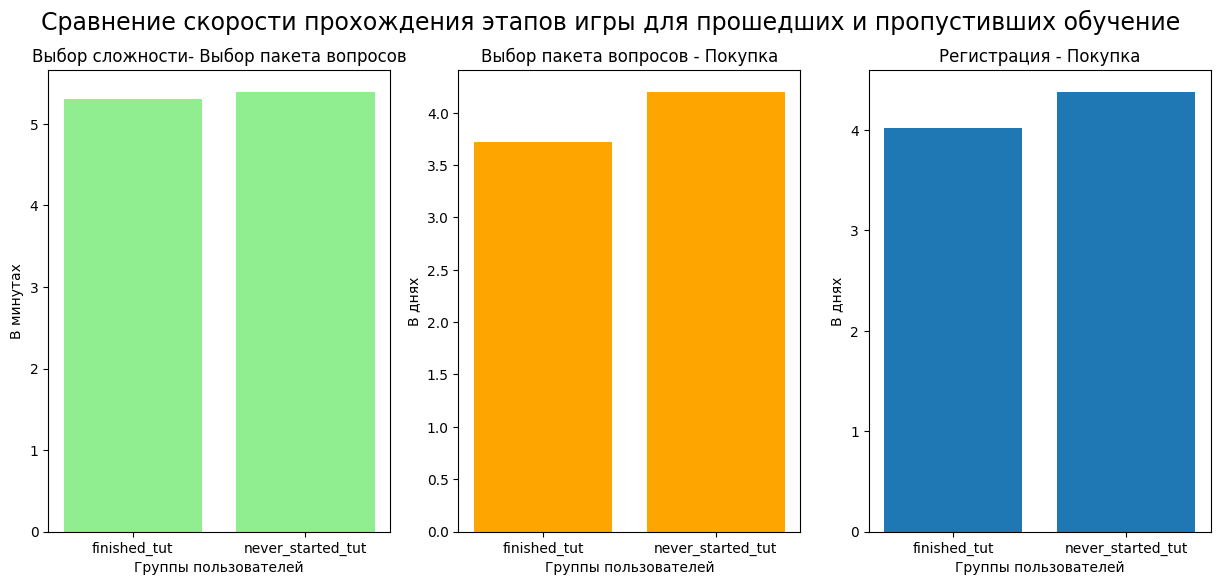

In [377]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle("Сравнение скорости прохождения этапов игры для прошедших и пропустивших обучение", fontsize=17)
axes[0].bar(x=level_pack.index, 
    height=level_pack,
    color='lightgreen',
)
axes[0].set_title('Выбор сложности- Выбор пакета вопросов')
axes[0].set_ylabel('В минутах')
axes[0].set_xlabel('Группы пользователей')

axes[1].bar(x=pack_purchase.index, 
    height=pack_purchase,
    color='orange',
)
axes[1].set_title('Выбор пакета вопросов - Покупка')
axes[1].set_ylabel('В днях')
axes[1].set_xlabel('Группы пользователей')

axes[2].bar(x=regist_purchase.index, 
    height=regist_purchase,
)
axes[2].set_title('Регистрация - Покупка')
axes[2].set_ylabel('В днях')
axes[2].set_xlabel('Группы пользователей')

-для проверки гипотезы выявлены 2 группы пользователей: **Finished_tut** - завершившие обучение; **Never_started_tut** - не начинавшие обучение.

-для этих групп сравнивалась скорость прохождения 3-ёх этапов:

 1 - время от выбора уровня сложности до выбора пакета вопросов;
 
 2 - время от выбора пакета вопросов до покупки;

 3 - время от регистрации до покупки

### <a name='link4'></a> Выводы по 1-ой гипотезе

-разница для сравниваемых групп в прохождении первого этапа практически отсутствует (5.3 и 5.4 минуты);

-разница в прохождении второго этапа присутствует (3.7 и 4.2 дня). **Пользователи завершившие обучение быстрее (на 14%) проходят этап от выбора пакета вопросов до покупки**;

-разница в прохождении третьего этапа присутствует (4 и 4.4 дня). **Пользователи завершившие обучение быстрее (на 10%) проходят этап  от регистрации до покупки**



### <a name='link5'></a> Проверка 2-ой гипотезы. Зависимость обучения и покупки платных вопросов

Находим уникальный путь каждого пользователя

In [360]:
user_path_df = (
    total_events_df.groupby(["user_id"])["event_type"].apply(list).reset_index()
)
user_path_df.head()

,user_id,event_type
0,27832,[registration]
1,27833,"[registration, tutorial_start, tutorial_finish]"
2,27834,"[registration, tutorial_start, tutorial_finish]"
3,27835,"[registration, tutorial_start, tutorial_finish..."
4,27836,"[registration, tutorial_start, tutorial_start,..."


Преобразуем event_path для более удобного использования

In [361]:
user_path_df["event_path"] = user_path_df["event_type"].apply(lambda x: " > ".join(x))
user_path_df.head()

,user_id,event_type,event_path
0,27832,[registration],registration
1,27833,"[registration, tutorial_start, tutorial_finish]",registration > tutorial_start > tutorial_finish
2,27834,"[registration, tutorial_start, tutorial_finish]",registration > tutorial_start > tutorial_finish
3,27835,"[registration, tutorial_start, tutorial_finish...",registration > tutorial_start > tutorial_finis...
4,27836,"[registration, tutorial_start, tutorial_start,...",registration > tutorial_start > tutorial_start...


Оставляем только пользователей с покупкой, удаляем лишний столбец 'event_type', сбрасываем индексы

In [362]:
user_path_df_with_purchase = user_path_df[user_path_df['event_path'].str.contains('purchase')]
user_path_df_with_purchase = user_path_df_with_purchase[['user_id','event_path']].reset_index(drop=True)
user_path_df_with_purchase.head()

,user_id,event_path
0,27845,registration > tutorial_start > tutorial_finis...
1,27865,registration > tutorial_start > level_choice >...
2,27884,registration > tutorial_start > tutorial_finis...
3,27910,registration > tutorial_start > tutorial_finis...
4,27911,registration > tutorial_start > level_choice >...


Создаем новые столбцы,в которых подсчитано кол-во 'tutorial_start' и 'tutorial_finish'

In [363]:
user_path_df_with_purchase['starts_count'] = user_path_df_with_purchase.event_path.str.count('tutorial_start')
user_path_df_with_purchase['finishes_count'] = user_path_df_with_purchase.event_path.str.count('tutorial_finish')
user_path_df_with_purchase.head()


,user_id,event_path,starts_count,finishes_count
0,27845,registration > tutorial_start > tutorial_finis...,2,2
1,27865,registration > tutorial_start > level_choice >...,1,0
2,27884,registration > tutorial_start > tutorial_finis...,3,2
3,27910,registration > tutorial_start > tutorial_finis...,1,1
4,27911,registration > tutorial_start > level_choice >...,1,0


Создаем функцию category_func,чтобы выделить 4 категории: 
- 'обучение начато, но не закончено' 
- 'обучение начато и закончено'
- 2 и более обучений начато и закончено'
- 'без обучения'

In [364]:
def category_func(row):
    if row['starts_count']>=1 and row['finishes_count']==0:
        return 'обучение начато, но не закончено'
    if row['starts_count']==1 and row['finishes_count']==1:
        return 'обучение начато и закончено'
    if row['starts_count']>=2 and row['finishes_count']>=1:
        return '2 и более обучений начато и закончено'
    else:
        return 'без обучения'
    

Создаем новый столбец category с помощью функции category_func.

In [365]:
user_path_df_with_purchase['category'] = user_path_df_with_purchase.apply(category_func,axis=1)
user_path_df_with_purchase.head()

,user_id,event_path,starts_count,finishes_count,category
0,27845,registration > tutorial_start > tutorial_finis...,2,2,2 и более обучений начато и закончено
1,27865,registration > tutorial_start > level_choice >...,1,0,"обучение начато, но не закончено"
2,27884,registration > tutorial_start > tutorial_finis...,3,2,2 и более обучений начато и закончено
3,27910,registration > tutorial_start > tutorial_finis...,1,1,обучение начато и закончено
4,27911,registration > tutorial_start > level_choice >...,1,0,"обучение начато, но не закончено"


В новой categories_df группируем данные по категориям и подсчитываем кол-во пользователей в каждой из них.

In [366]:
categories_df = user_path_df_with_purchase.groupby('category')['user_id'].count().sort_values(ascending=False)
categories_df.head()

category
обучение начато и закончено              1083
2 и более обучений начато и закончено     364
обучение начато, но не закончено          131
без обучения                               22
Name: user_id, dtype: int64

Создаем круговую диаграмму на основе библиотеки Matplotlib.

Text(0.5, 1.0, 'Категории пользователей совершавших оплату (зависимость от обучения)')

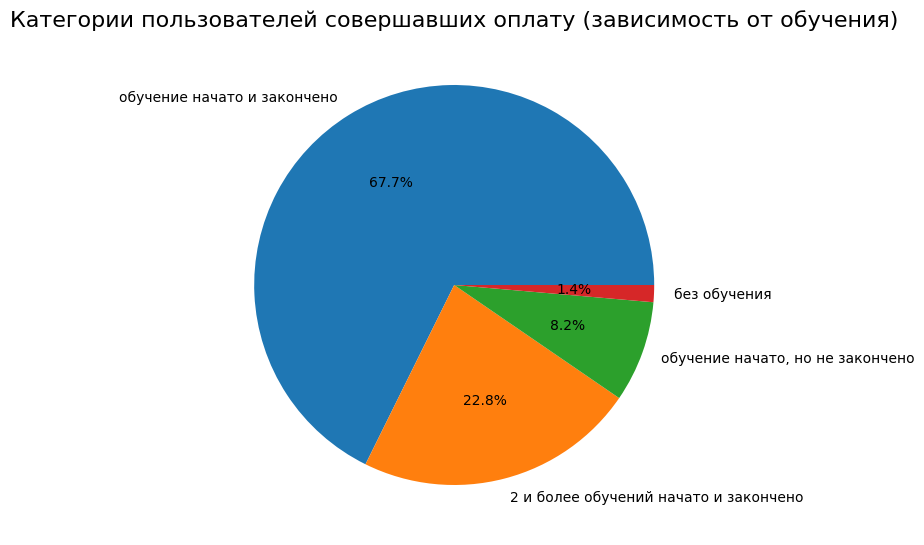

In [367]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    categories_df,
    labels=categories_df.index,
    autopct='%.1f%%',
);
axes.set_title('Категории пользователей совершавших оплату (зависимость от обучения)', fontsize=16)

### <a name='link6'></a> Выводы по 2-ой гипотезе

-**законченное** обучение является залогом дальнейших покупок;

-**повторное** обучение составляет только 22% по сравнению с 67% **одноразового**. Т.е. не так важно сколько было попыток обучения, важно, чтобы они были завершены;

-незаконченное обучение - лучше чем, его отсутствие (8.2% по сравнению с 1.4%);

-пропустив этап обучения, пользователь почти наверняка НЕ совершит покупку.


### <a name='link7'></a> Проверка 3-ей гипотезы. Насколько прозрачен процесс взаимодействия с игрой

Воспользуемся созданной ранее user_path_df. В ней отражены пользовательские пути 19926-ти игроков.

In [368]:
user_path_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19926 non-null  int64 
 1   event_type  19926 non-null  object
 2   event_path  19926 non-null  object
dtypes: int64(1), object(2)
memory usage: 467.1+ KB


Можно увидеть, что самым распростаренным сценарием является Регистрация, после которой пользователь покидает приложение.

In [369]:
user_path_df['event_path'].value_counts().head()

registration                                                                               7970
registration > tutorial_start > tutorial_finish > level_choice > pack_choice               2796
registration > tutorial_start > tutorial_finish                                            1956
registration > tutorial_start > tutorial_finish > level_choice                             1713
registration > tutorial_start > tutorial_finish > level_choice > pack_choice > purchase    1083
Name: event_path, dtype: int64

Выделим тех игроков, которые сразу приступают к игре, пропуская обучение. Оставим только необходимые в дальнейшем столбцы, сбросим индексы.

In [370]:
user_path_start_with_level_choice = user_path_df[user_path_df['event_path'].str.contains('registration > level_choice')]
user_path_start_with_level_choice = user_path_start_with_level_choice[['user_id','event_path']].reset_index(drop=True)
user_path_start_with_level_choice.head()

,user_id,event_path
0,27921,registration > level_choice
1,28033,registration > level_choice > pack_choice > pu...
2,28145,registration > level_choice > pack_choice
3,28464,registration > level_choice
4,28865,registration > level_choice > pack_choice


Соотнесем число игроков, которые сразу приступают к игре с общим кол-вом пользователей.

In [371]:
users_without_tut = round(user_path_start_with_level_choice.shape[0]/user_path_df.shape[0]*100,2)
print('Доля пользователей, которые сразу приступают к игре - ', users_without_tut, '%' )

Доля пользователей, которые сразу приступают к игре -  0.49 %


Проверим дальнейшие пути таких игроков. Среди них нет сценария, по которому будет выбрано обучение.

In [372]:
user_path_start_with_level_choice['event_path'].value_counts()

registration > level_choice > pack_choice               52
registration > level_choice                             24
registration > level_choice > pack_choice > purchase    22
Name: event_path, dtype: int64

Выделим тех игроков, которые ПОВТОРНО начинают обучение. Оставим только необходимые в дальнейшем столбцы, сбросим индексы.

In [373]:
user_path_agian_tutorial = user_path_df[user_path_df['event_path'].str.contains('level_choice > tutorial_start'or'pack_choice > tutorial_start'or'purchase > tutorial_start'or'tutorial_finish > tutorial_start')]
user_path_agian_tutorial = user_path_agian_tutorial[['user_id','event_path']].reset_index(drop=True)
user_path_agian_tutorial.head()

,user_id,event_path
0,27842,registration > tutorial_start > tutorial_finis...
1,27852,registration > tutorial_start > tutorial_finis...
2,27862,registration > tutorial_start > tutorial_finis...
3,27876,registration > tutorial_start > tutorial_finis...
4,27931,registration > tutorial_start > tutorial_start...


Соотнесем число таких игроков с общим кол-ом пользователей.

In [374]:
users_tut_agian = round(user_path_agian_tutorial.shape[0]/user_path_df.shape[0]*100,2)
print('Доля пользователей, которые ПОВТОРНО начинают обучение - ', users_tut_agian, '%' )

Доля пользователей, которые ПОВТОРНО начинают обучение -  2.46 %


###  <a name='link8'></a> Выводы по 3-ей гипотезе

-доля пользователей, которые **сразу приступают** к игре пропуская обучение очень незначительна - 0.49%. Среди них никто в дальнейшем не возвращается к обучению

-доля пользователей, которые **повторно** возращаются к обучению - 2.46%



### <a name='link9'></a> Финальные выводы и рекомендации


### Гипотеза 1

- Не прослеживается явной связи между обучением и скоростью прохождения этапов игры.

- Пользователи завершившие обучение (по сравнению с не проходившими)чуть быстрее доходят до покупки. От этапа выбора пакета вопросов на 14%, от этапа регистрации на 10%.


### Гипотеза 2

- Завершенное обучение безусловно положительно влияет на покупки (90.5% всех оплат). При этом повторное обучение значительно уступает первичному, т.е. не является важным фактором.

### Гипотеза 3

- Процесс взаимодействия с игрой достаточно ясен и прозрачен. 0.49% всех пользователей успешно играет без обучения. Повторно обучаются только 2.46% игроков.

### Рекомендации

- Сразу после регистрации сосредоточить внимание пользователя на обучении и поощрять его успешное окончание.



